In [4]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import catboost


ModuleNotFoundError: No module named 'catboost'

In [2]:
pip install catboost


     |████████████████████████████████| 12.9 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 26.5 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 1.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import catboost

In [4]:
df = pd.read_excel("Variant777.xlsx", engine='openpyxl')
df.head()

,Успех,Площадь загальна кв.м,Этаж,Количество касс,Тип,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Середній дохід населення,Населення середнє,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка,Церква
0,не успішний,9.0,1,1,Light,NaN,659.0,1.56,15610.0,11298.0,0,0,0,0,1
1,не успішний,30.0,1,1,Light,8.0,1518.0,2.03,12600.0,18903.0,0,0,0,0,0
2,не успішний,15.0,1,1,light,NaN,476.0,1.81,12600.0,20252.0,0,0,0,0,0
3,не успішний,20.0,1,1,light,NaN,1310.0,2.18,13930.0,2540.0,0,0,0,0,0
4,не успішний,30.0,1,1,light,NaN,2029.0,1.63,16030.0,6896.0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Успех                             69 non-null     object 
 1   Площадь загальна кв.м             69 non-null     float64
 2   Этаж                              69 non-null     int64  
 3   Количество касс                   69 non-null     int64  
 4   Тип                               69 non-null     object 
 5   Кількість відгуків в гуглі        39 non-null     float64
 6   Количество чеков                  62 non-null     float64
 7   Среднее количество единиц в чеке  62 non-null     float64
 8   Середній дохід населення          64 non-null     float64
 9   Населення середнє                 64 non-null     float64
 10  Прогулянкова зона                 69 non-null     int64  
 11  Якість покриття перед магазином   69 non-null     int64  
 12  Стихійна т

# null values

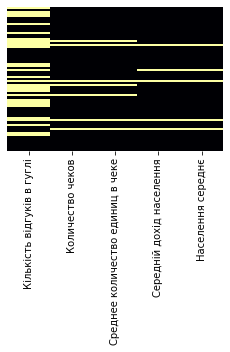

In [6]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.5, 0.5])
missings = pd.DataFrame(df.isnull().sum())
vars_with_missings = missings[missings > 1].dropna().index.tolist()
sns.heatmap(df[vars_with_missings].isnull(),
            cbar=False, yticklabels=False, cmap='inferno', ax=ax)
plt.show()

#Заполним недостающие значения средним значением

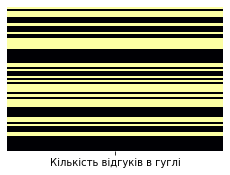

In [7]:
df['Количество чеков'] = df['Количество чеков'].fillna(df['Количество чеков'].mean())
df['Среднее количество единиц в чеке'] = df['Среднее количество единиц в чеке'].fillna(df['Среднее количество единиц в чеке'].mean())
df['Населення середнє'] = df['Населення середнє'].fillna(df['Населення середнє'].mean())
df['Середній дохід населення'] = df['Середній дохід населення'].fillna(df['Середній дохід населення'].mean())
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.5, 0.5])
missings = pd.DataFrame(df.isnull().sum())
vars_with_missings = missings[missings > 1].dropna().index.tolist()
sns.heatmap(df[vars_with_missings].isnull(),
            cbar=False, yticklabels=False, cmap='inferno', ax=ax)
plt.show()

Мы не будем использывать информацию о количестве отзывов в гугле так как у нас очень много неизвестных данных.

In [8]:
df = df.drop(columns=['Кількість відгуків в гуглі'])
df

,Успех,Площадь загальна кв.м,Этаж,Количество касс,Тип,Количество чеков,Среднее количество единиц в чеке,Середній дохід населення,Населення середнє,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка,Церква
0,не успішний,9.00,1,1,Light,659.0,1.56,15610.0,11298.0,0,0,0,0,1
1,не успішний,30.00,1,1,Light,1518.0,2.03,12600.0,18903.0,0,0,0,0,0
2,не успішний,15.00,1,1,light,476.0,1.81,12600.0,20252.0,0,0,0,0,0
3,не успішний,20.00,1,1,light,1310.0,2.18,13930.0,2540.0,0,0,0,0,0
4,не успішний,30.00,1,1,light,2029.0,1.63,16030.0,6896.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,51.77,1,2,Standart,6884.0,1.89,8750.0,42781.0,0,0,0,0,0
65,успішний,27.26,1,1,Light,4721.0,1.85,13300.0,32400.0,0,0,0,0,0
66,не успішний,148.91,1,1,Light,3286.0,1.99,11060.0,29287.0,1,0,0,0,0
67,не успішний,50.93,1,2,Standart,3963.0,1.73,11900.0,5705.0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Успех                             69 non-null     object 
 1   Площадь загальна кв.м             69 non-null     float64
 2   Этаж                              69 non-null     int64  
 3   Количество касс                   69 non-null     int64  
 4   Тип                               69 non-null     object 
 5   Количество чеков                  69 non-null     float64
 6   Среднее количество единиц в чеке  69 non-null     float64
 7   Середній дохід населення          69 non-null     float64
 8   Населення середнє                 69 non-null     float64
 9   Прогулянкова зона                 69 non-null     int64  
 10  Якість покриття перед магазином   69 non-null     int64  
 11  Стихійна торгівля                 69 non-null     int64  
 12  Зона пікні

# Encoding

In [10]:
df.Успех.value_counts()

не успішний    44
успішний       25
Name: Успех, dtype: int64

In [11]:
df.Тип.value_counts()

Light       39
Standart    19
light        9
Micro        1
Premium      1
Name: Тип, dtype: int64

In [12]:
df.Этаж.value_counts()

1    69
Name: Этаж, dtype: int64

In [13]:
type_ = {'Light':0,'Standart':1, 'light':2, 'Micro':3, 'Premium':4}
df['Тип'] = df['Тип'].map(type_)
df

,Успех,Площадь загальна кв.м,Этаж,Количество касс,Тип,Количество чеков,Среднее количество единиц в чеке,Середній дохід населення,Населення середнє,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка,Церква
0,не успішний,9.00,1,1,0,659.0,1.56,15610.0,11298.0,0,0,0,0,1
1,не успішний,30.00,1,1,0,1518.0,2.03,12600.0,18903.0,0,0,0,0,0
2,не успішний,15.00,1,1,2,476.0,1.81,12600.0,20252.0,0,0,0,0,0
3,не успішний,20.00,1,1,2,1310.0,2.18,13930.0,2540.0,0,0,0,0,0
4,не успішний,30.00,1,1,2,2029.0,1.63,16030.0,6896.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,51.77,1,2,1,6884.0,1.89,8750.0,42781.0,0,0,0,0,0
65,успішний,27.26,1,1,0,4721.0,1.85,13300.0,32400.0,0,0,0,0,0
66,не успішний,148.91,1,1,0,3286.0,1.99,11060.0,29287.0,1,0,0,0,0
67,не успішний,50.93,1,2,1,3963.0,1.73,11900.0,5705.0,0,0,0,0,0


In [14]:
type_ = {'не успішний':0,'успішний':1}
df['Успех'] = df['Успех'].map(type_)
df

,Успех,Площадь загальна кв.м,Этаж,Количество касс,Тип,Количество чеков,Среднее количество единиц в чеке,Середній дохід населення,Населення середнє,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка,Церква
0,0,9.00,1,1,0,659.0,1.56,15610.0,11298.0,0,0,0,0,1
1,0,30.00,1,1,0,1518.0,2.03,12600.0,18903.0,0,0,0,0,0
2,0,15.00,1,1,2,476.0,1.81,12600.0,20252.0,0,0,0,0,0
3,0,20.00,1,1,2,1310.0,2.18,13930.0,2540.0,0,0,0,0,0
4,0,30.00,1,1,2,2029.0,1.63,16030.0,6896.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,51.77,1,2,1,6884.0,1.89,8750.0,42781.0,0,0,0,0,0
65,1,27.26,1,1,0,4721.0,1.85,13300.0,32400.0,0,0,0,0,0
66,0,148.91,1,1,0,3286.0,1.99,11060.0,29287.0,1,0,0,0,0
67,0,50.93,1,2,1,3963.0,1.73,11900.0,5705.0,0,0,0,0,0


# Chouse features

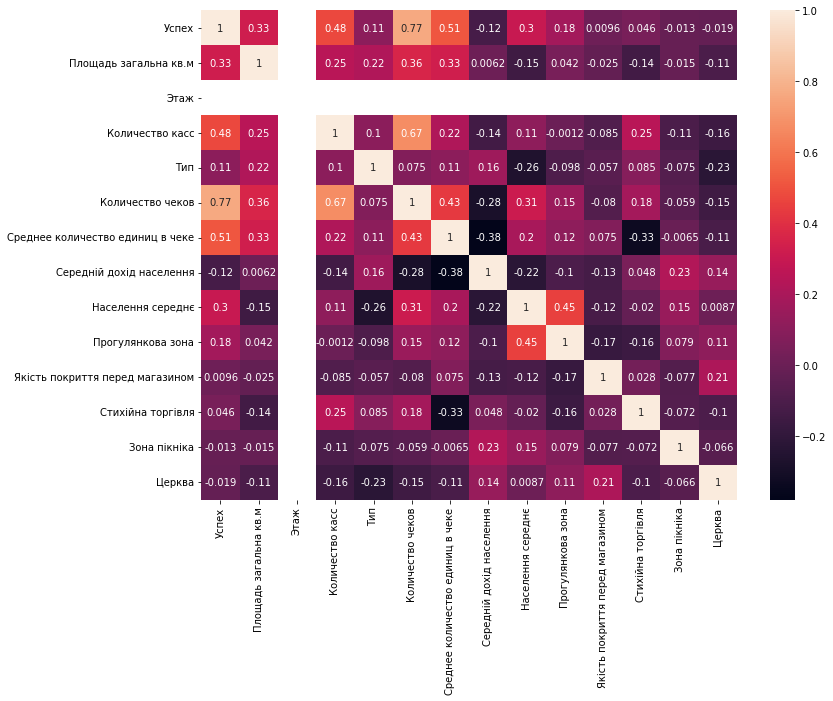

In [15]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

# Classification Tree & Ensembles

In [16]:
features = ['Количество чеков', 'Количество касс']
X =df[features]
y = df['Успех']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [17]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

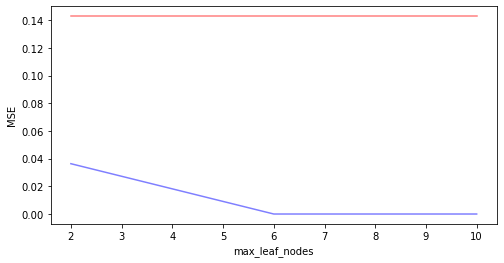

In [18]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

# model

In [19]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 3, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

# resul

In [20]:
# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

0.8571428571428571

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9 2]
 [0 3]]


In [22]:
df.drop(columns=['Успех']).columns

Index(['Площадь загальна кв.м', 'Этаж', 'Количество касс', 'Тип',
       'Количество чеков', 'Среднее количество единиц в чеке',
       'Середній дохід населення', 'Населення середнє', 'Прогулянкова зона',
       'Якість покриття перед магазином', 'Стихійна торгівля', 'Зона пікніка',
       'Церква'],
      dtype='object')

Text(0.5, 1.0, 'Boosting. Feature Importance')

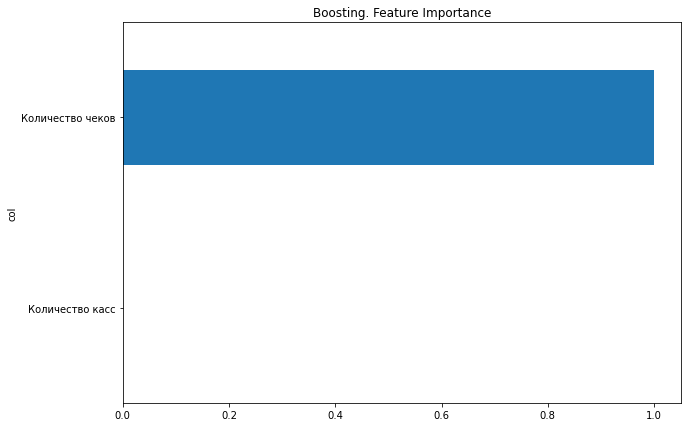

In [23]:
# Features importances
col = features
ct_imp = pd.DataFrame({'imp': ct.feature_importances_, 'col': col})
ct_imp = ct_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
ct_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

# visualisation

In [26]:
pip install netcdf4

     |████████████████████████████████| 4.2 MB 1.6 MB/s eta 0:00:01     |███████████▍                    | 1.5 MB 1.6 MB/s eta 0:00:02
     |████████████████████████████████| 222 kB 10.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


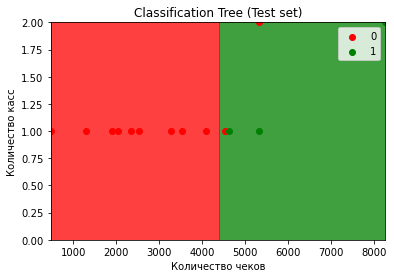

In [28]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков'].min() - 1, stop = X_set['Количество чеков'].max() + 1),
                     np.arange(start = X_set['Количество касс'].min() - 1, stop = X_set['Количество касс'].max() + 1))
plt.contourf(X1, X2, ct.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков'][y_set == j], X_set['Количество касс'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification Tree (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Количество касс')
plt.legend()
plt.show()

 # Forest

Parameters

In [29]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

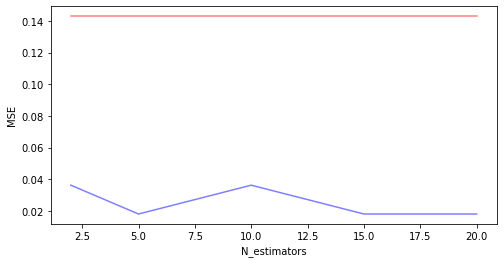

In [30]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [32]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=5, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")



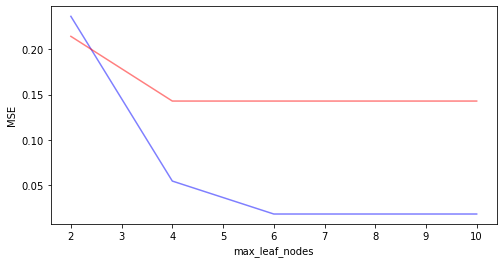

In [33]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

# model


In [34]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 9, max_leaf_nodes = 8, random_state = 10).fit(X_train, y_train)

# results

In [35]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test).round(3)

0.857

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9 2]
 [0 3]]


Text(0.5, 1.0, 'Boosting. Feature Importance')

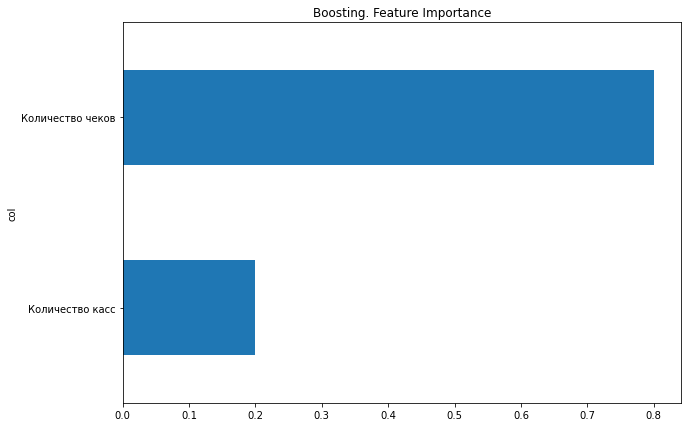

In [37]:
# Features importances
rf_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': col})
rf_imp = rf_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
rf_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

# visualisation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


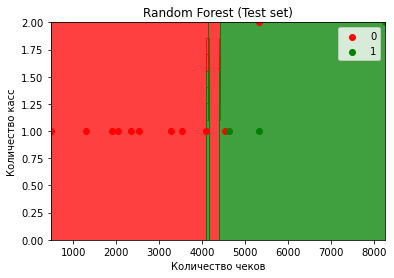

In [38]:
X_set, y_set = X_test, y_test
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков'].min() - 1, stop = X_set['Количество чеков'].max() + 1),
                     np.arange(start = X_set['Количество касс'].min() - 1, stop = X_set['Количество касс'].max() + 1))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков'][y_set == j], X_set['Количество касс'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Количество касс')
plt.legend()
plt.show()

# catboost

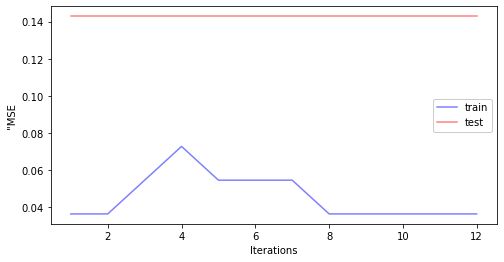

In [39]:
def catboost_best_iterations(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=i,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel('"MSE')
    ax.set_xlabel('Iterations')
    ax.legend(framealpha=1, frameon=True);
    
from catboost import CatBoostClassifier
catboost_best_iterations(X_train, X_test, y_train, y_test, list(range(1,13)))

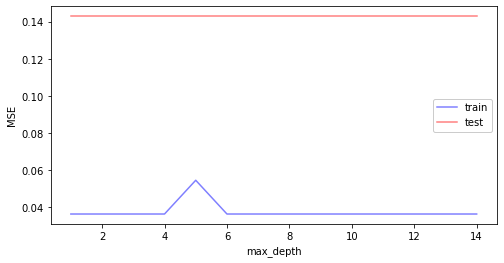

In [40]:
def catboost_max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=12,max_depth=i,random_state=10).fit(X_train,y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

catboost_max_depth(X_train, X_test, y_train, y_test, list(range(1,15)))

# model

In [41]:
# Fitting CatBoost to the Training set
cb = CatBoostClassifier(iterations=12,max_depth=6,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')

# result

In [42]:
# Predicting the Test set results
cb_y_pred = cb.predict(X_test)
cb.score(X_test,y_test).round(3)

0.857

In [43]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, cb_y_pred)
print(cm)

[[9 2]
 [0 3]]


Text(0.5, 1.0, 'Boosting. Feature Importance')

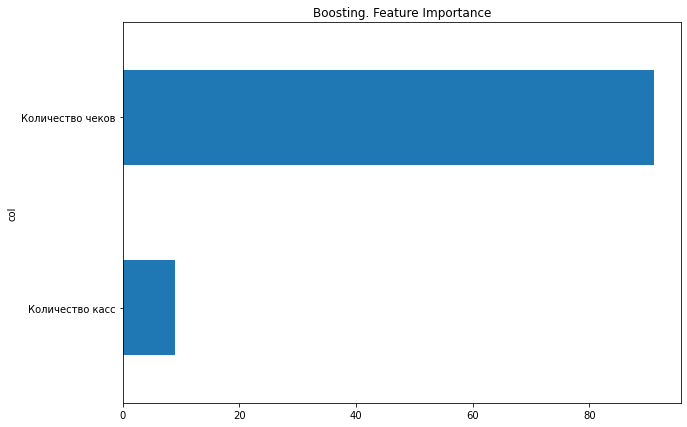

In [44]:
# Features importances
cb_imp = pd.DataFrame({'imp': cb.get_feature_importance(), 'col': col})
cb_imp = cb_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
cb_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


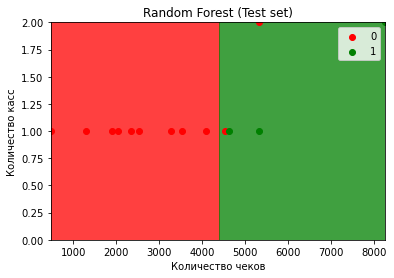

In [45]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков'].min() - 1, stop = X_set['Количество чеков'].max() + 1),
                     np.arange(start = X_set['Количество касс'].min() - 1, stop = X_set['Количество касс'].max() + 1))
plt.contourf(X1, X2, cb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков'][y_set == j], X_set['Количество касс'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Количество касс')
plt.legend()
plt.show()

# Hierarchical Clustering

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df_arr = sc.transform(df)

In [47]:
df = pd.DataFrame(df_arr, columns=df.columns).round()

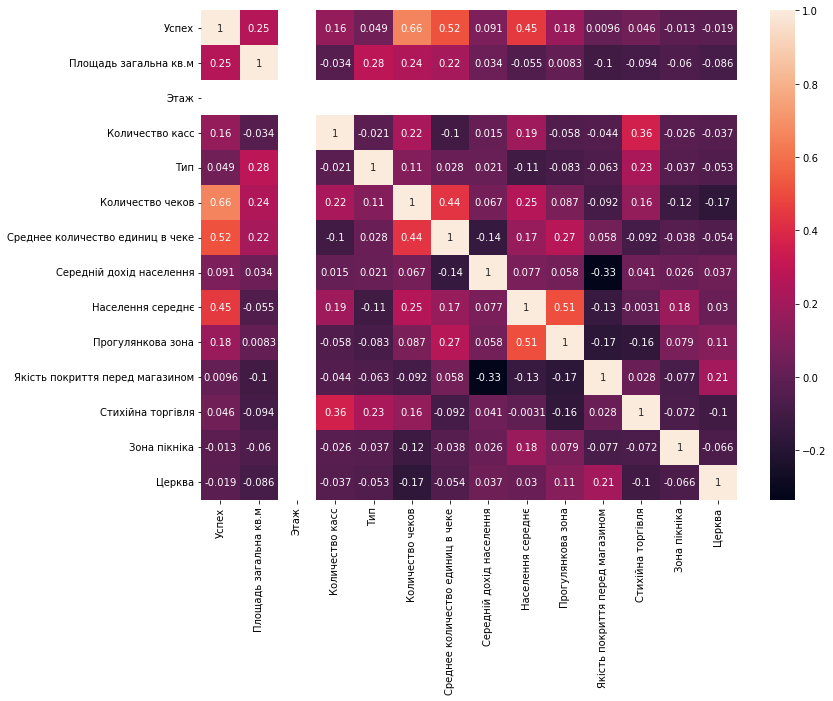

In [48]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

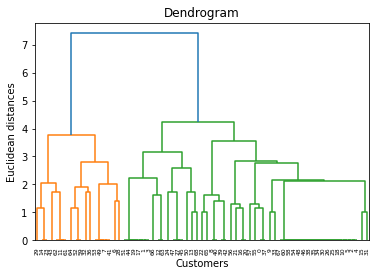

In [49]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Исходя из графика можно сказть что подходящее количество классов это 2 или 3

In [50]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [51]:
hc

array([1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1,
       1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1,
       2, 1, 2])

# Feature Reduction

In [52]:
X = df.iloc[:, [0, 5, 6]]

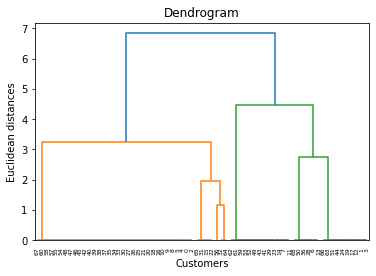

In [53]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Исходя из графика можно сказть что подходящее количество классов это 2

In [54]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [55]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

# K-Means Clustering

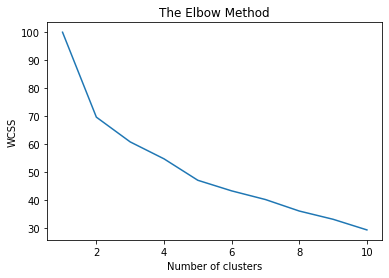

In [56]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

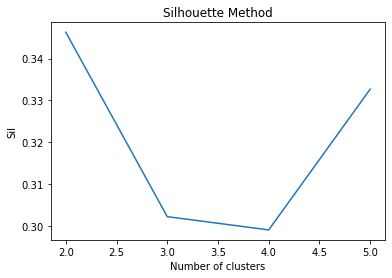

2:0.34625822080263474
3:0.3023314207940713
4:0.2991674858498478
5:0.3326966167171705


In [57]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

# model

In [58]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = df.columns).round(2)

,Успех,Площадь загальна кв.м,Этаж,Количество касс,Тип,Количество чеков,Среднее количество единиц в чеке,Середній дохід населення,Населення середнє,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка,Церква
0,1.00,0.40,0.0,-0.00,0.10,0.70,0.90,1.00,0.00,0.00,0.20,0.10,0.00,0.00
1,0.02,0.00,0.0,0.00,0.02,0.02,0.20,0.98,0.11,0.11,0.11,0.09,0.05,0.09
2,0.93,0.07,0.0,0.07,-0.00,0.53,0.73,1.00,1.00,0.53,0.07,0.13,0.07,0.13


# Feature Reduction

In [59]:
X = df.iloc[:, [0, 5, 6]]

In [60]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Количество чеков','Количество касс']).round()

,Успех,Количество чеков,Количество касс
0,0.0,0.0,0.0
1,1.0,1.0,1.0


Мы наглядно видим что данные разбились на два четких класса. Один успешный другой же нет

# Results matching

In [61]:
# Importing hc clusters
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [62]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km).round(3)

0.826